In [1]:
import pandas as pd
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix
import multiprocessing
import copy
from tqdm import tqdm
import time
from math import sqrt
from skimage import io 
from PIL import Image, ImageFilter
import random
from keras.preprocessing.image import ImageDataGenerator 
import torchvision
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

%matplotlib inline

## Visualisation and Modification



In [5]:
# LOADING THE DATA

#Defining our four class names
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

#No. of classes
nb_classes = len(class_names)

#Image pixel width x height
IMAGE_SIZE = (200, 200)

#Loading Training and Testing folders
datasets = ['/kaggle/input/brain-tumor-mri-dataset/Training', '/kaggle/input/brain-tumor-mri-dataset/Testing']
output = []
#Perform for both Training and Testing
for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        #Searching through each folder corresponding to a class
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            #Searching through every image within the folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Getting path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Opening and resizing image
                image = cv2.imread(img_path)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its label to the output
                images.append(image)
                labels.append(label)
        
        #Convert to array
        images = np.array(images)
        labels = np.array(labels)   
        
        output.append((images, labels))

#Define training and testing images and labels
(train_images, train_labels), (test_images, test_labels) = output

Loading /kaggle/input/brain-tumor-mri-dataset/Training


 14%|█▎        | 218/1595 [00:01<00:12, 112.19it/s]


KeyboardInterrupt: 

3

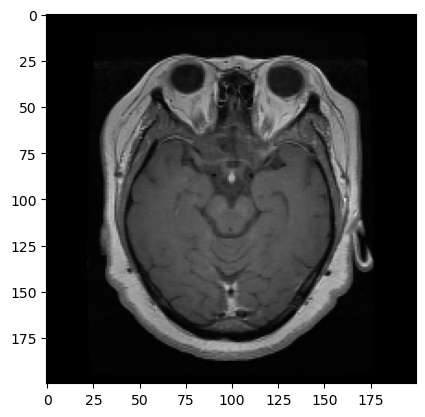

In [5]:
#CHECKING IMAGE
plt.imshow(train_images[150])
train_labels[150]

In [6]:
#BUILDING INITIAL MODEL
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (IMAGE_SIZE[0], IMAGE_SIZE[1], 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

#Compiling model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 128)               9

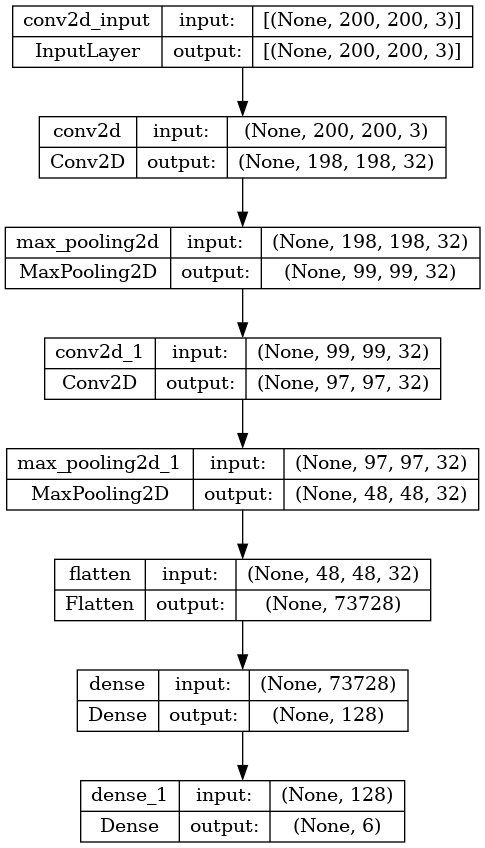

In [8]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, rankdir='TB')

In [18]:
#TRAINING CNN
cnn = model.fit(train_images, train_labels, batch_size=55, epochs=20, validation_split = 0.2)

Epoch 1/20
84/84 [==============================] - 3s 32ms/step - loss: 1.3115e-05 - accuracy: 1.0000 - val_loss: 1.8497e-05 - val_accuracy: 1.0000
Epoch 2/20
84/84 [==============================] - 2s 26ms/step - loss: 1.1276e-05 - accuracy: 1.0000 - val_loss: 2.0430e-05 - val_accuracy: 1.0000
Epoch 3/20
84/84 [==============================] - 2s 27ms/step - loss: 9.8918e-06 - accuracy: 1.0000 - val_loss: 2.2420e-05 - val_accuracy: 1.0000
Epoch 4/20
84/84 [==============================] - 2s 26ms/step - loss: 8.8185e-06 - accuracy: 1.0000 - val_loss: 2.4435e-05 - val_accuracy: 1.0000
Epoch 5/20
84/84 [==============================] - 2s 26ms/step - loss: 7.8440e-06 - accuracy: 1.0000 - val_loss: 2.6352e-05 - val_accuracy: 1.0000
Epoch 6/20
84/84 [==============================] - 2s 28ms/step - loss: 7.0534e-06 - accuracy: 1.0000 - val_loss: 2.8813e-05 - val_accuracy: 1.0000
Epoch 7/20
84/84 [==============================] - 2s 25ms/step - loss: 6.3951e-06 - accuracy: 1.0000 - v

<function matplotlib.pyplot.show(close=None, block=None)>

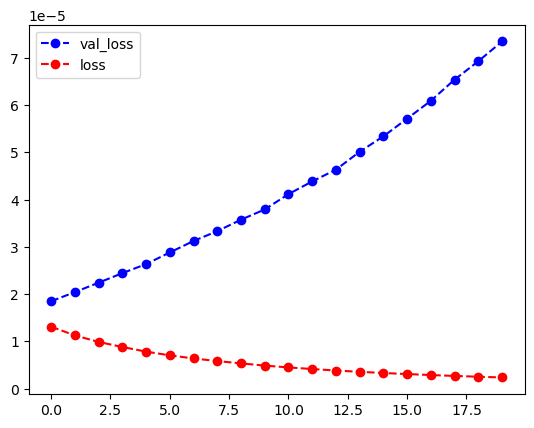

In [20]:
#PLOT ACCURACY VS LOSS

plt.plot(cnn.history['val_loss'],'bo--',label="val_loss")
plt.plot(cnn.history['loss'],'ro--',label="loss")

plt.legend()
plt.show

In [15]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

In [12]:
test_loss = model.evaluate(test_images, test_labels)

41/41 [==============================] - 0s 6ms/step - loss: 0.4152 - accuracy: 0.9474


In [14]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

41/41 [==============================] - 0s 5ms/step


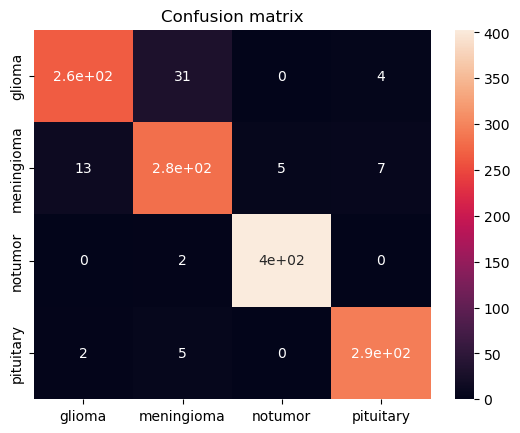

In [15]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [19]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

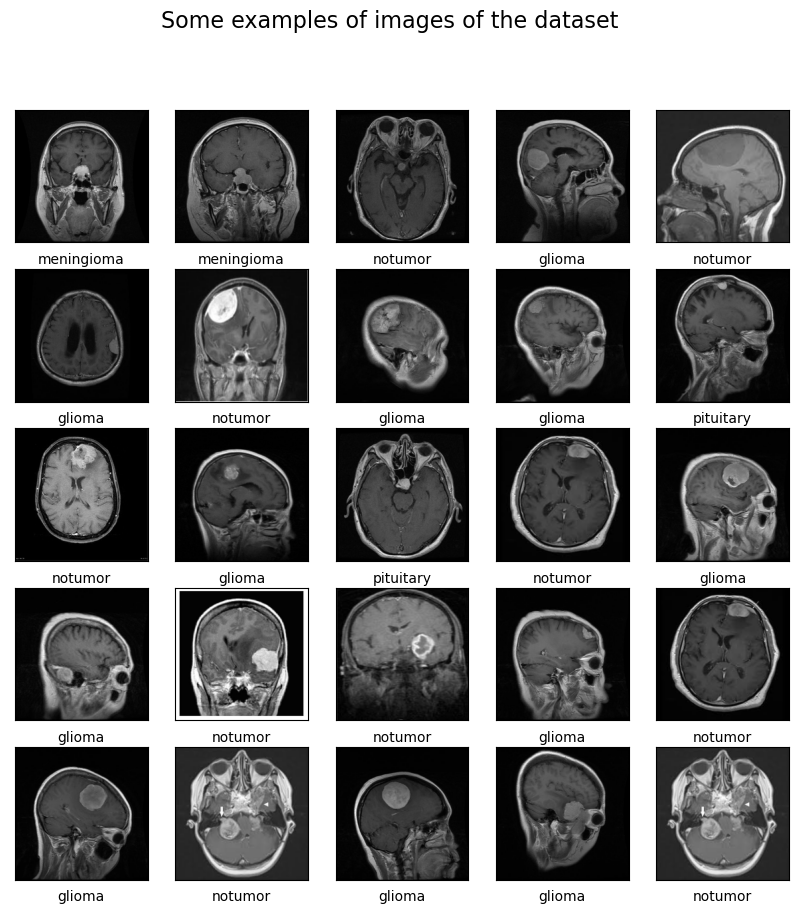

In [20]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

In [21]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


In [22]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

41/41 [==============================] - 4s 107ms/step


In [23]:
train_features.shape

(5712, 6, 6, 512)

In [24]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x*y*z

In [25]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

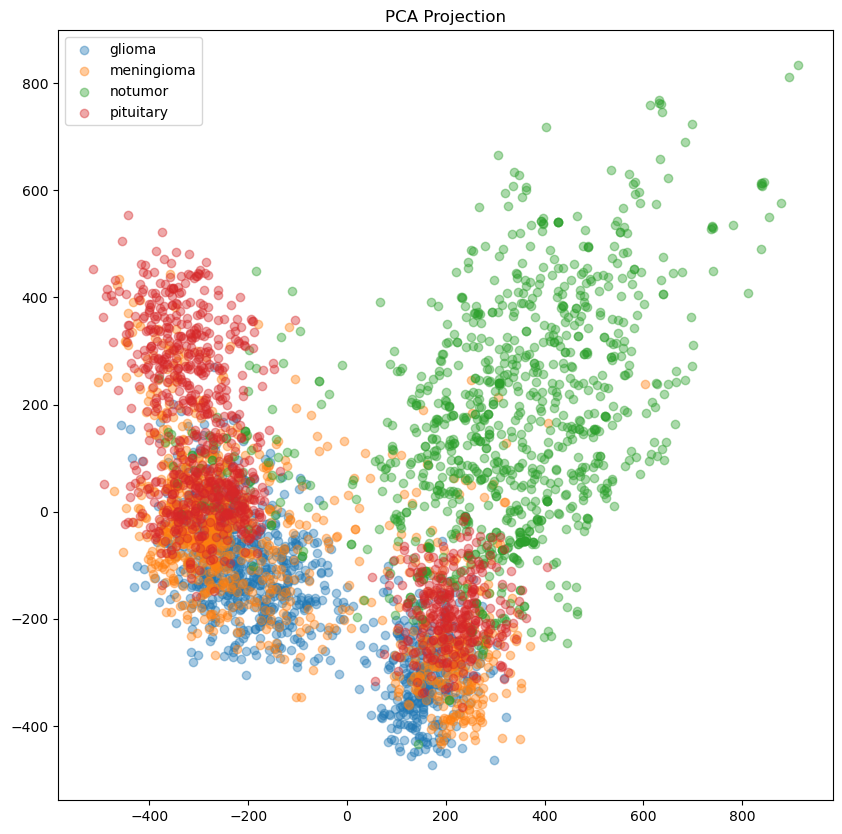

In [26]:
plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

In [27]:
flattened_train_images = train_images.reshape(len(train_images),train_images.shape[1]*train_images.shape[2]*train_images.shape[3])

In [28]:
X = pd.DataFrame(flattened_train_images)

In [29]:
np.shape(X)

(5712, 120000)

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 10)

test = pca.fit(X)

C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

In [ ]:
test = [C[:,0],C[:,1],C[:,2],C[:,3],C[:,4],C[:,5],C[:,6],C[:,7],C[:,8],C[:,9]]
test2 = np.transpose(test)
np.shape(test2)

In [ ]:

#labels[2]

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(test2)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

plt.hist(labels)

In [ ]:
def display_examples_new(images):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()
    
display_examples_new(train_images)

In [ ]:
tops = train_images[106:403]

#plt.imshow(tops[1])

plt.imshow(train_images[16])

To do:

- Rewrite this whole thing in a vaguely competent and structured way
- Get the preprocessed data and start working with that
- Check that Shreya hasn't already done this
- Maybe make mini-CNN for learning head shape?
